<a href="https://colab.research.google.com/github/Zyuuu-G/Optics/blob/main/JonesMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sympy import *
import numpy as np

In [ ]:
### Matrixs

theta = symbols('theta')

hori = Matrix([[1,0],[0,0]])  # x polarizer

vert = Matrix([[0,0],[0,1]])  # y polarizer

#lin45 = Matrix([[1/2,1/2],[1/2,1/2]])  # might be wrong

#lin135 = Matrix([[1/2,-1/2],[-1/2,1/2]]) # might be wrong

rot_polar = Matrix([[cos(theta),-sin(theta)],[sin(theta),cos(theta)]])

rot_coord = Matrix([[cos(theta),sin(theta)],[-sin(theta),cos(theta)]])


In [ ]:
### Fresnel coefficents

ni, nf, thetai, thetaf = symbols('ni nf thetai thetaf')

thetaf = asin(ni*sin(thetai)/nf)

ts = 2*ni*cos(thetai)/(ni*cos(thetai)+nf*cos(thetaf))

rs = (ni*cos(thetai)-nf*cos(thetaf))/(ni*cos(thetai)+nf*cos(thetaf))

tp = 2*ni*cos(thetai)/(ni*cos(thetaf)+nf*cos(thetai))

rp = (ni*cos(thetaf)-nf*cos(thetai))/(ni*cos(thetaf)+nf*cos(thetai))


# Optics hw 7

## Ziyu Gao
### 11/8/2022

In [ ]:
### Steck problem 8.3
theta45 = np.pi/4

T_ahead = rot_coord.subs(theta,-theta45)*hori*rot_coord.subs(theta,theta45)*rot_polar.subs(theta,theta45)*hori
display('going ahead',T_ahead)

T_back =  hori*rot_polar.subs(theta,-theta45)*rot_coord.subs(theta,theta45)*hori*rot_coord.subs(theta,theta45)
display('going back',T_back)

lightx = Matrix([1,0])

display(T_ahead*lightx)
display(T_back*lightx)


'going ahead'

Matrix([
[0.707106781186548, 0],
[0.707106781186547, 0]])

'going back'

Matrix([
[1.57009245868378e-16, 1.57009245868377e-16],
[                   0,                    0]])

Matrix([
[0.707106781186548],
[0.707106781186547]])

Matrix([
[1.57009245868378e-16],
[                   0]])

In [ ]:
rot_coord.subs(theta,-theta45)*vert*rot_coord.subs(theta,theta45)

Matrix([
[ 0.5, -0.5],
[-0.5,  0.5]])

# Optics hw 8
## Ziyu Gao
### 11/29/2022

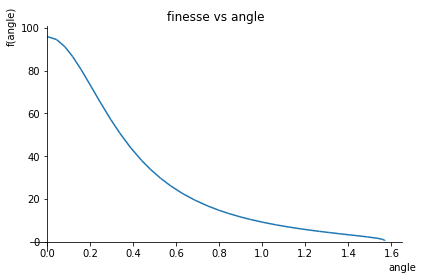

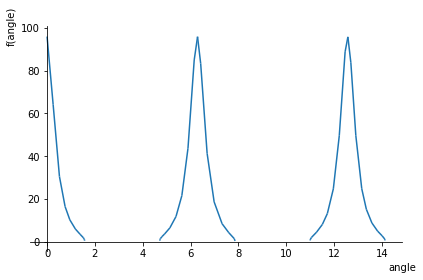

In [ ]:
# problem 1.
# d)

angle = symbols('angle')

light = Matrix([1,0])
aftSpliter = hori*rot_polar*light
aft = aftSpliter[0,0].subs(theta,angle)   # extra "1-loss" due to polarization
#p1 = plot(aft,(angle,0,3.14))

survive = .99**3*0.975*0.99*aft
#p2 = plot(survive, (angle,0,3.14))

finesse = pi*survive**(1/4)/(1-survive**(1/2))
#print(finesse)
P3 = plot(finesse,(angle,0,3.14),title='finesse vs angle')
P4 = plot(finesse,(angle,0,15))

## finesse of the cavity goes to zero when angle is at 90 deg, which make sense bc intensity also goes to zero when all the light blocked. (finesse is proportional to output intencity)

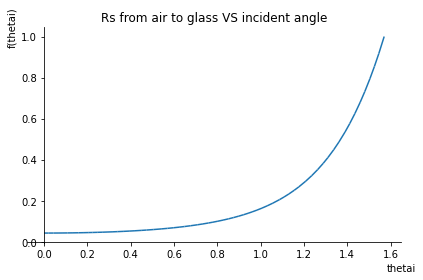

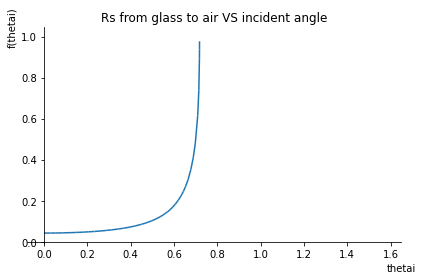

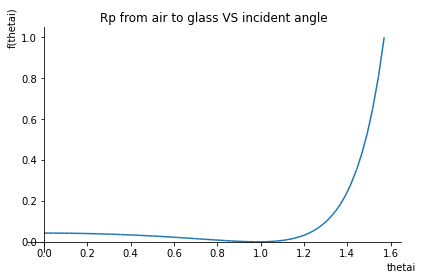

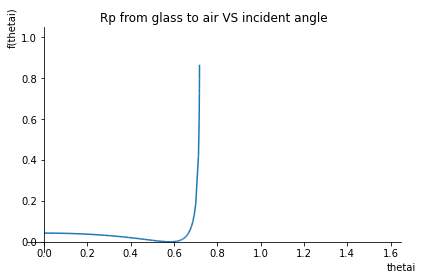

In [ ]:
# Steck Problem 9.5

n_air = 1
n_glass = 1.52

Rs_ag = rs.subs([(ni,n_air),(nf,n_glass)])**2
#print(Rs_ag)
plot(Rs_ag,(thetai,0,pi/2),title='Rs from air to glass VS incident angle')

Rs_ga = rs.subs([(ni,n_glass),(nf,n_air)])**2
plot(Rs_ga,(thetai,0,pi/2),title='Rs from glass to air VS incident angle')

Rp_ag =rp.subs([(ni,n_air),(nf,n_glass)])**2
plot(Rp_ag,(thetai,0,pi/2),title='Rp from air to glass VS incident angle')

Rp_ga = rp.subs([(ni,n_glass),(nf,n_air)])**2
plot(Rp_ga,(thetai,0,pi/2),title='Rp from glass to air VS incident angle')

# Rp is wierd, something wrong somewhere